## Notebook containing code used for manuscript figure 6

## Packages

In [3]:
import warnings, string
import anndata as ad
import spateo as st
import dynamo as dyn
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="ticks", font_scale=1)
warnings.filterwarnings('ignore')

## Figure 6c- 3D cell alignment map and cell type transition matrix between E9.5 and E11.5 hearts

In [4]:
lscmap = mpl.cm.get_cmap("vlag_r")
regions = ["Left ventricle", "Right ventricle", "Outflow tract", "Right atrium", "Left atrium"]
regions_hex_list = [mpl.colors.to_hex(lscmap(i)) for i in np.linspace(0, 1, len(regions))]
regions_colors = {i: j for i, j in zip(regions, regions_hex_list)}

View of AnnData object with n_obs × n_vars = 19780 × 12163
    obs: 'area', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'louvain', 'cellbin_SpatialDomain', 'slices', 'reclustering', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
    obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new'
    layers: 'total' View of AnnData object with n_obs × n_vars = 98966 × 17869
    obs: 'ctype_user', 'cml', 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
    obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new'
    layers: 'total'


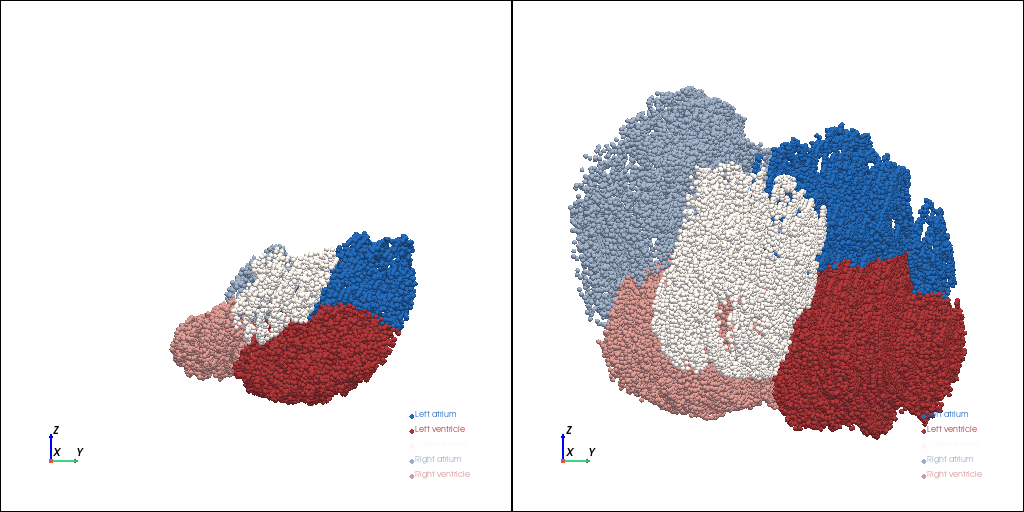

In [5]:
E95_adata = st.read_h5ad(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E9.5_h5ad/mouse_E9.5_heart_updated_align_new.h5ad")
E95_adata = E95_adata[:, ~E95_adata.var.index.str.endswith('Rik')]
E95_adata = E95_adata[:, ~E95_adata.var.index.str.endswith('Rik8')]
E95_adata = E95_adata[:, ~E95_adata.var.index.str.startswith('Gm')]
E95_adata = E95_adata[:, ~E95_adata.var.index.str.startswith('a')]
for letter1 in string.ascii_uppercase:
    for letter2 in string.ascii_uppercase:
        E95_adata = E95_adata[:, ~E95_adata.var.index.str.startswith(f'{letter1}{letter2}')]
        
E115_adata = st.read_h5ad(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E11.5_h5ad/mouse_E11.5_heart_updated_align_new.h5ad")
E115_adata = E115_adata[:, ~E115_adata.var.index.str.endswith('Rik')]
E115_adata = E115_adata[:, ~E115_adata.var.index.str.endswith('Rik8')]
E115_adata = E115_adata[:, ~E115_adata.var.index.str.startswith('Gm')]
E115_adata = E115_adata[:, ~E115_adata.var.index.str.startswith('a')]
for letter1 in string.ascii_uppercase:
    for letter2 in string.ascii_uppercase:
        E115_adata = E115_adata[:, ~E115_adata.var.index.str.startswith(f'{letter1}{letter2}')]
print(E95_adata, E115_adata)

E95_pc, _ = st.tdr.construct_pc(adata=E95_adata,spatial_key='3d_align_spatial',groupby='heart_regions', key_added='heart_regions', colormap=regions_colors)
E115_pc, _ = st.tdr.construct_pc(adata=E115_adata,spatial_key='3d_align_spatial',groupby='heart_regions', key_added='heart_regions', colormap=regions_colors)
cpo = [(4132.5, 505.6, 581.8),(283.8, 505.6, 581.8), (0.0, 0.0, 1.0)]
st.pl.three_d_multi_plot(
    model=st.tdr.collect_models([E95_pc, E115_pc]),
    key='heart_regions',
    model_style="points",
    jupyter="static",
    cpo=[cpo],
    model_size=5,
)

In [5]:
# Preprocess
common_genes = np.intersect1d(E95_adata.var_names, E115_adata.var_names)

E95_adata = E95_adata[:, E95_adata.var_names.isin(common_genes)].copy()
E95_adata.obs.index = f"E9.5_" + E95_adata.obs.index

E115_adata = E115_adata[:, E115_adata.var_names.isin(common_genes)].copy()
E115_adata.obs.index = f"E11.5_" + E115_adata.obs.index

combined_adata = ad.concat([E95_adata, E115_adata])
dyn.pp.select_genes_by_pearson_residuals(adata=combined_adata, n_top_genes=200, inplace=True)
combined_hvg_adata = combined_adata[:, combined_adata.var["gene_highly_variable"]].copy()

E95_hvg_adata = combined_hvg_adata[combined_hvg_adata.obs['stage'] == 'E9.5']
E115_hvg_adata = combined_hvg_adata[combined_hvg_adata.obs['stage'] == 'E11.5']
E95_hvg_adata, E115_hvg_adata

|-----> gene selection on layer: X
|-----> extracting highly variable genes
|-----------> filtered out 0 outlier genes


(View of AnnData object with n_obs × n_vars = 19780 × 200
     obs: 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
     var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'gene_highly_variable', 'use_for_pca'
     uns: 'pp'
     obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new'
     layers: 'total',
 View of AnnData object with n_obs × n_vars = 98966 × 200
     obs: 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
     var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'gene_highly_variable', 'use_for_pca'
     uns: 'pp'
     obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new'
     layers: 'total')

In [6]:
# Mapping
label_transfer_prior = {
    'Left ventricle': {'Left ventricle': 0.96, 'Left atrium': 0.01, 'Outflow tract': 0.01, 'Right atrium': 0.01, 'Right ventricle': 0.01},
    'Left atrium': {'Left ventricle': 0.01, 'Left atrium': 0.96, 'Outflow tract': 0.01, 'Right atrium': 0.01, 'Right ventricle': 0.01},
    'Outflow tract': {'Left ventricle': 0.01, 'Left atrium': 0.01, 'Outflow tract': 0.96, 'Right atrium': 0.01, 'Right ventricle': 0.01},
    'Right atrium': {'Left ventricle': 0.01, 'Left atrium': 0.01, 'Outflow tract': 0.01, 'Right atrium': 0.96, 'Right ventricle': 0.01},
    'Right ventricle': {'Left ventricle': 0.01, 'Left atrium': 0.01, 'Outflow tract': 0.01, 'Right atrium': 0.01, 'Right ventricle': 0.96},
}
mapped_adatas, mapping_pis, _ = st.align.morpho_align_sparse(
    models=[E115_hvg_adata.copy(), E95_hvg_adata.copy()],
    spatial_key='3d_align_spatial',
    key_added=f"3d_align_spatial_morpho",
    device="0",
    mode="SN-S",
    max_iter=200,
    partial_robust_level=1,
    beta=0.2, # nonrigid, 
    beta2_end=0.2, # low beta2_end, high expression similarity
    lambdaVF=1,
    K=200,
    SVI_mode=True,
    use_sparse=True,
    use_label_prior=True,
    label_key='heart_regions',
    label_transfer_prior=label_transfer_prior,
)
mapped_adatas

|-----? Currently this function can only be run using GPU.
|-----> [Models alignment based on morpho, mode: SN-S.] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 200 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 293.4735412597656.
beta2: 0.12860393524169922 --> 0.20000000298023224
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [169.5235s]
|-----> Key Parameters: gamma: 0.9900000095367432; beta2: 0.20000000298023224; sigma2: 0.03611099720001221
|-----> [Models alignment based on morpho, mode: SN-S.] in progress: 100.0000%
|-----> [Models alignment based on morpho, mode: SN-S.] finished [9.7694s]


[AnnData object with n_obs × n_vars = 98966 × 200
     obs: 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
     var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'gene_highly_variable', 'use_for_pca'
     uns: 'pp'
     obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new', '3d_align_spatial_morpho', '3d_align_spatial_morpho_rigid', '3d_align_spatial_morpho_nonrigid'
     layers: 'total',
 AnnData object with n_obs × n_vars = 19780 × 200
     obs: 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions'
     var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'gene_highly_variable', 'use_for_pca'
     uns: 'pp', 'iter_spatial', 'VecFld_morpho'
     obsm: '3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new', '3d_align_spatial_morpho', '3d_align_spatial_morpho_rigid', '3d_align_spatial_morpho_nonri

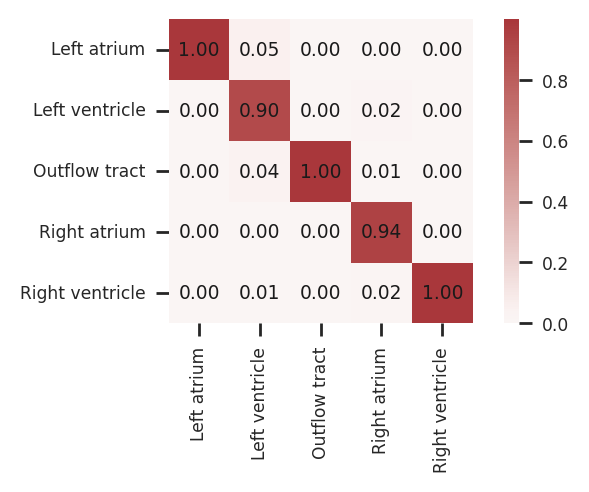

In [7]:
## Transition matrix of mapping 
E95_mapped_adata = mapped_adatas[1]
E115_mapped_adata = mapped_adatas[0]

cat1 = E95_mapped_adata.obs['heart_regions'].cat.categories.values
cat2 = E115_mapped_adata.obs['heart_regions'].cat.categories.values
confusion_matrix = np.zeros((len(cat1), len(cat2)))
for i in range(E95_mapped_adata.shape[0]):
    self_label = E95_mapped_adata[i].obs['heart_regions'].values[0]
    transfer_label = E115_mapped_adata[np.argmax(mapping_pis[0][i])].obs['heart_regions'].values[0]
    index1 = np.where(cat1 == self_label)[0][0]
    index2 = np.where(cat2 == transfer_label)[0][0]
    confusion_matrix[index1, index2] += 1
confusion_matrix_norm = confusion_matrix.copy()
confusion_matrix_norm = confusion_matrix_norm / np.expand_dims(np.sum(confusion_matrix_norm, axis=0), 0)

matrix = pd.DataFrame(data=confusion_matrix_norm, columns=cat2, index=cat1)
sns.set_theme(context="paper", style="ticks", font_scale=0.7)
f, ax = plt.subplots(figsize=(4, 2))
sns.heatmap(matrix, cmap="vlag", annot=True, fmt=".2f", annot_kws={"color": "k"}, linewidths=0, square=True, center=0)
plt.show()

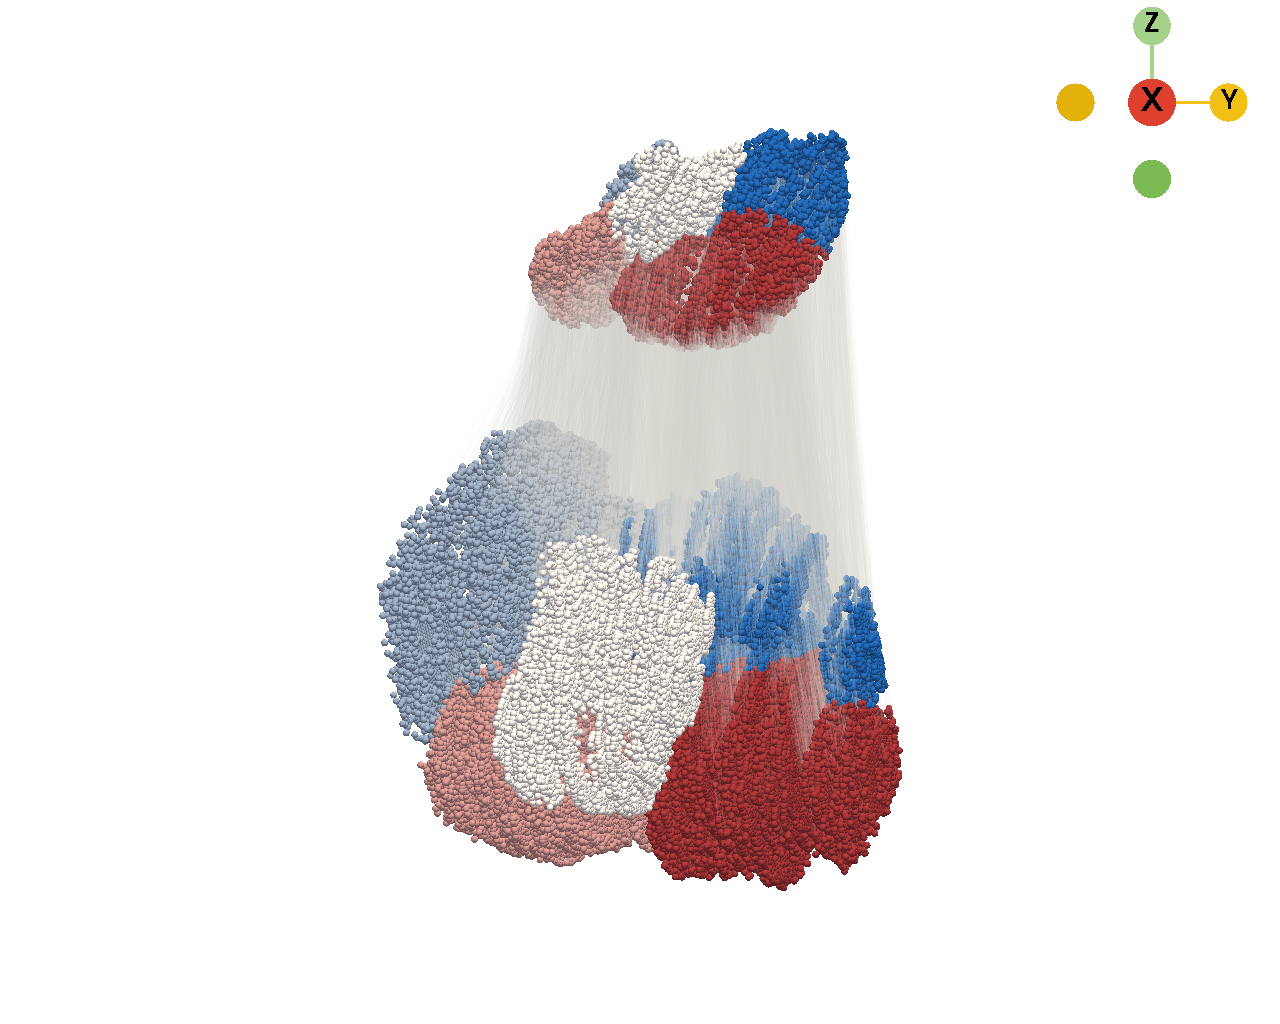

In [8]:
models_distance = np.asarray([0, 0, -1500])
E115_pc.points = E115_pc.points + models_distance
X_cells_mapping = np.asarray([E115_pc.points[np.argmax(mapping_pis[0][i])] for i in range(E95_pc.points.shape[0])])

model_lines, _ = st.tdr.construct_align_lines(
    model1_points=E95_adata.obsm['3d_align_spatial'],
    model2_points=X_cells_mapping, key_added="mapping",
    label="mapping_lines", color="gainsboro", alpha=0.2,
)

_ = st.pl.three_d_plot(
    model=st.tdr.collect_models([model_lines, st.tdr.merge_models([E95_pc, E115_pc])]),
    key=["mapping", "heart_regions"],
    opacity=[0.1, 1],
    model_style=["wireframe", "points"],
    model_size=[1, 7],
    colormap=None,
    show_legend=False,
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
)

## Figure 6d- 3D quiver plots represent the cell migration field

|-----> [morphofield] in progress: 100.0000%
|-----> [morphofield] finished [234.7511s]
|-----? The number of start_points is more than 500. You may want to lower the max number of arrows to draw.


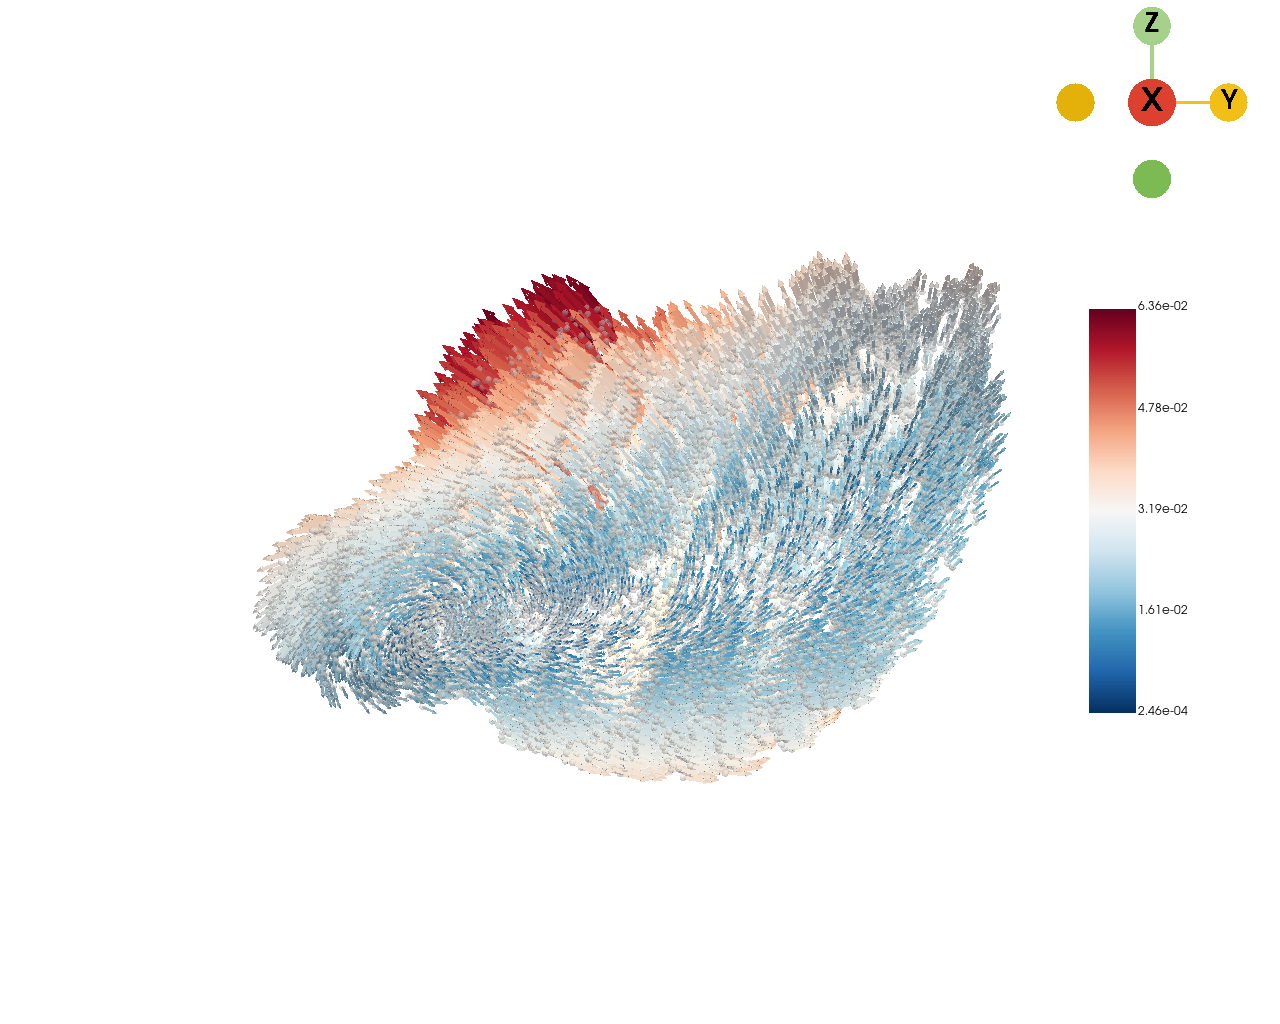

In [9]:
E95_adata.uns['VecFld_morpho'] = E95_mapped_adata.uns['VecFld_morpho']

st.tdr.morphofield_gp(
    adata=E95_adata,
    spatial_key="3d_align_spatial",
    vf_key="VecFld_morpho",
    NX=np.asarray(E95_adata.obsm['3d_align_spatial']),
    inplace=True,
)

E95_heart_pc, _ = st.tdr.construct_pc(adata=E95_adata,spatial_key="3d_align_spatial",groupby="heart_regions",key_added="heart_regions", colormap=regions_colors)
E95_heart_pc.point_data["vectors"] = E95_adata.uns["VecFld_morpho"]["V"]
E95_heart_arrows, _ = st.tdr.construct_field(
    model=E95_heart_pc, vf_key="vectors", arrows_scale_key="vectors", n_sampling=None, factor=1000, key_added="obs_index",
    label=np.asarray(E95_heart_pc.point_data["obs_index"]), 
)
st.pl.three_d_plot(
    model=st.tdr.collect_models([E95_heart_pc, E95_heart_arrows]),
    key=["heart_regions", "v_arrows"],
    colormap=["gainsboro", "RdBu_r"],
    opacity=[0.4, 1],
    model_style=["points", "wireframe"],
    model_size=[7, 1],
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
)

## Figure 6e- 3D streamline plot of the cell migration paths

uniformly sampling points along a trajectory: 100%|██████████| 19780/19780 [00:04<00:00, 4403.55it/s]


|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [290.9830s]
|-----? The number of start_points is more than 500. You may want to lower the max number of arrows to draw.


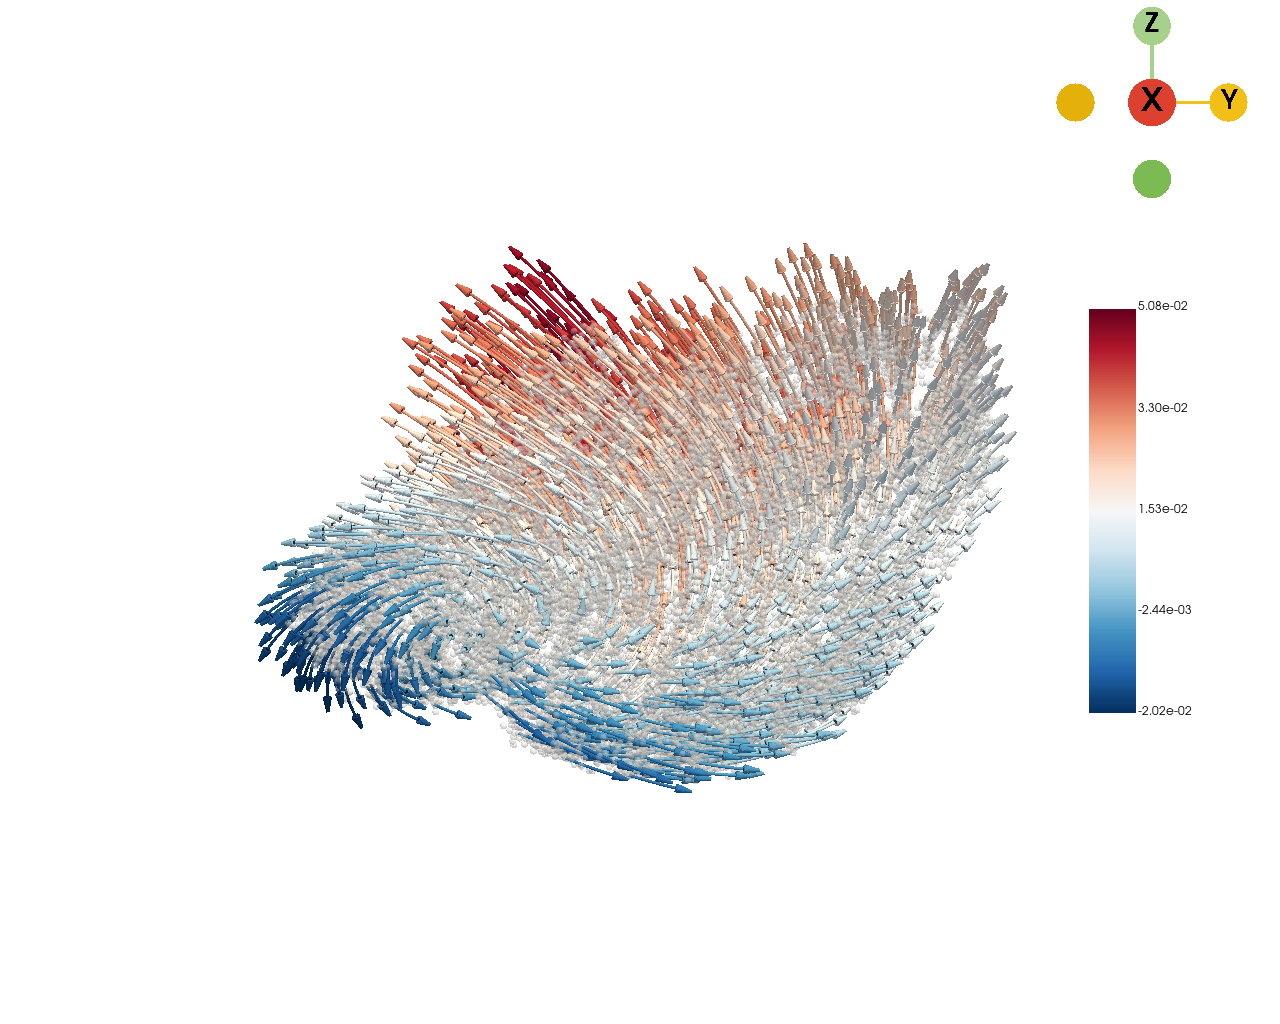

In [10]:
st.tdr.morphopath(
    adata=E95_adata,
    vf_key="VecFld_morpho",
    key_added="fate_morpho",
    t_end=2000,
    interpolation_num=10,
    cores=1,
)
E95_heart_paths, _ = st.tdr.construct_trajectory(
    adata=E95_adata,
    fate_key="fate_morpho",
    n_sampling=2000,
    sampling_method="trn",
    key_added="obs_index",
    tip_factor=20,
    label=np.asarray(E95_adata.obs.index),
)

E95_adata.obs["V_z"] = E95_adata.uns["VecFld_morpho"]["V"][:, 2].flatten()
st.tdr.add_model_labels(
    model=E95_heart_paths,
    key_added="trajectory",
    labels=np.asarray(E95_adata[np.asarray(E95_heart_paths.point_data["obs_index"])].obs["V_z"]),
    colormap="RdBu_r",
    where="point_data",
    inplace=True,
)
st.pl.three_d_plot(
    model=st.tdr.collect_models([E95_heart_pc, E95_heart_paths]),
    key=["heart_regions", "trajectory"],
    colormap=["gainsboro", "RdBu_r"],
    opacity=[0.4, 1],
    model_style=["points", "wireframe"],
    model_size=[7, 3],
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
)

## Figure 6f- The average migration directions and magnitude of cells of the five major structures of the heart

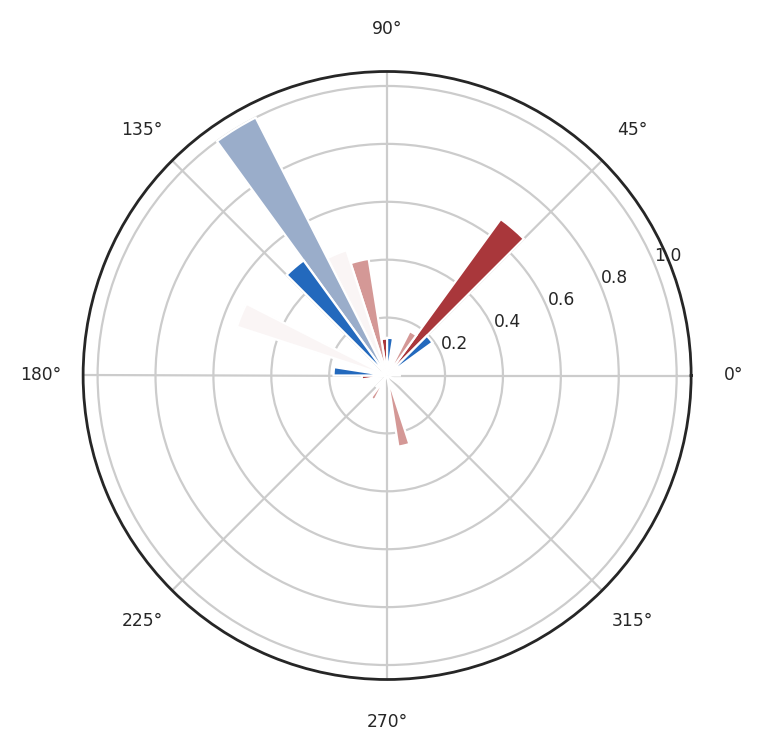

In [11]:
v_data = pd.DataFrame(E95_adata.uns["VecFld_morpho"]["V"], index=E95_adata.obs.index, columns=["X", "Y", "Z"])
v_data["heart_regions"] = E95_adata.obs["heart_regions"]

ax = plt.subplot(projection='polar')
quadrants = ["+_+_+", "-_+_+", "-_-_+", "+_-_+", "+_+_-", "-_+_-", "-_-_-", "+_-_-"]
for i, region in enumerate(regions):
    sub_v_data = v_data.loc[v_data["heart_regions"] == region, :]
    sub_v_data["quadrant_X"] = sub_v_data["X"].map(lambda x: "+_" if x >=0 else "-_")
    sub_v_data["quadrant_Y"] = sub_v_data["Y"].map(lambda x: "+_" if x >=0 else "-_")
    sub_v_data["quadrant_Z"] = sub_v_data["Z"].map(lambda x: "+" if x >=0 else "-")
    sub_v_data["quadrant"] = sub_v_data["quadrant_X"] + sub_v_data["quadrant_Y"] + sub_v_data["quadrant_Z"]
    quadrant_count_data = sub_v_data.groupby(by="quadrant")["quadrant"].count()
    quadrant_count_data = quadrant_count_data / quadrant_count_data.sum()
    for ind in quadrant_count_data.index:
        q = quadrants.index(ind)
        theta = (i * 1/4/5 + 1/4/5/2)*np.pi+q/4*np.pi
        radii = quadrant_count_data.loc[ind]
        width = 1/4/5 * np.pi
        ax = plt.subplot(projection='polar')
        ax.bar(theta, radii, width=width, bottom=0.0, color=regions_colors[region], alpha=1)
plt.show()

## Figure 6g- Differential geometry analysis of the morphometric vector field

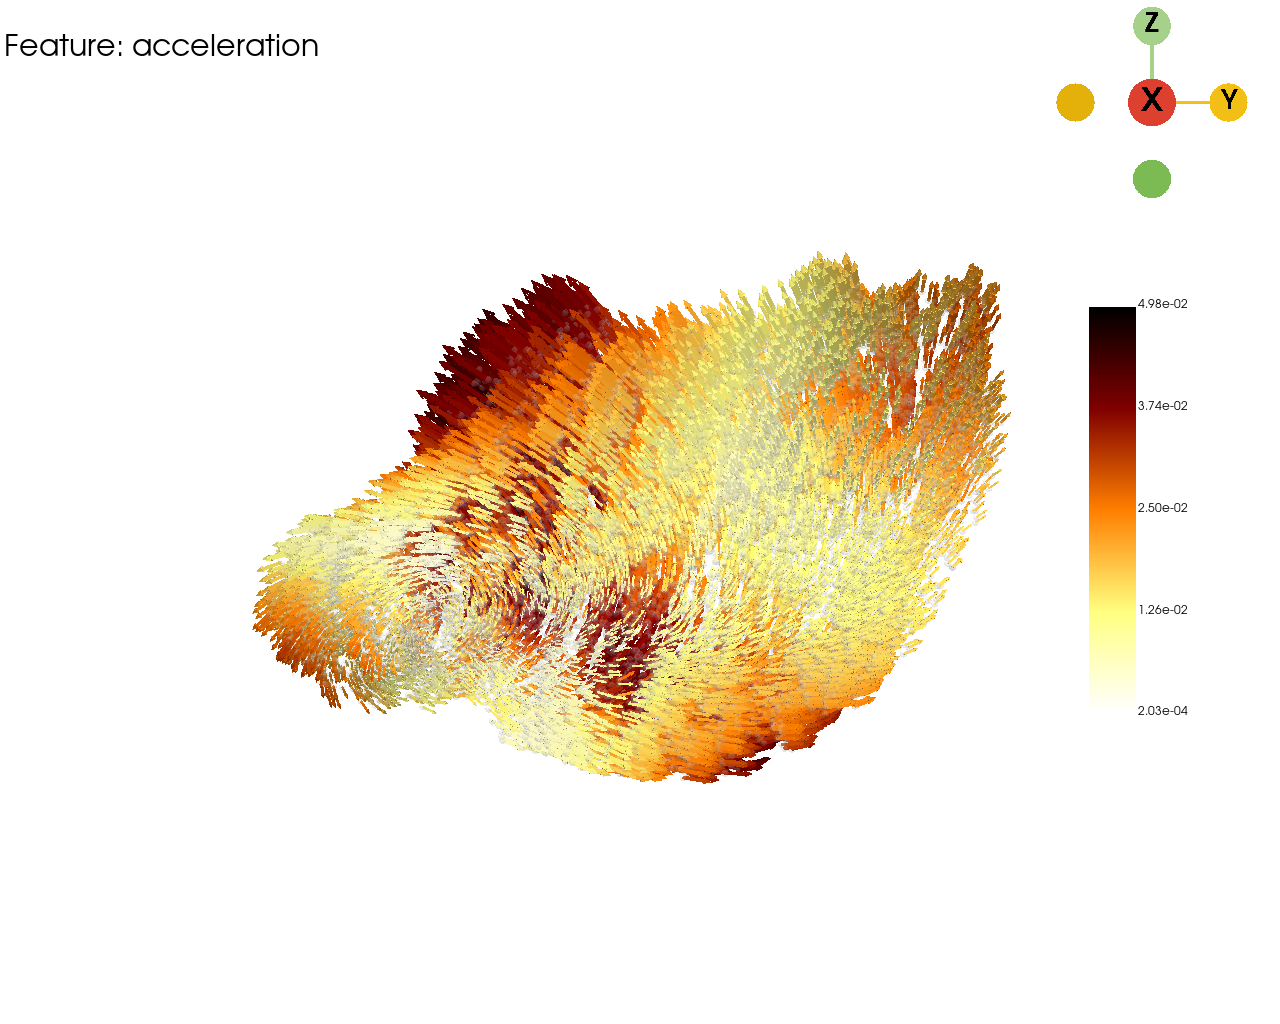

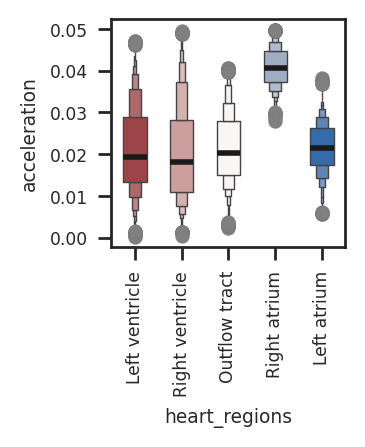

In [12]:
key = "acceleration"
st.tdr.morphofield_acceleration(adata=E95_adata, vf_key="VecFld_morpho",  key_added=key)
st.pl.acceleration(
    adata=E95_adata,
    model=st.tdr.collect_models([E95_heart_pc, E95_heart_arrows]),
    acceleration_key=key,
    colormap=["gainsboro", "afmhot_r"],
    model_style=["points", "wireframe"],
    opacity=[0.2, 1],
    model_size=[7, 1],
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
    background="white",
)

f, ax = plt.subplots(figsize=(1.5, 1.5))
sns.boxenplot(E95_adata.obs[["heart_regions", key]], x="heart_regions", y=key, palette=regions_colors, order=regions, linewidth=.5, line_kws=dict(linewidth=2, color="k"), flier_kws=dict(facecolor=".5", linewidth=.1), width=.5)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Calculating 3-D curl: 100%|██████████| 19780/19780 [00:00<00:00, 61764.61it/s]


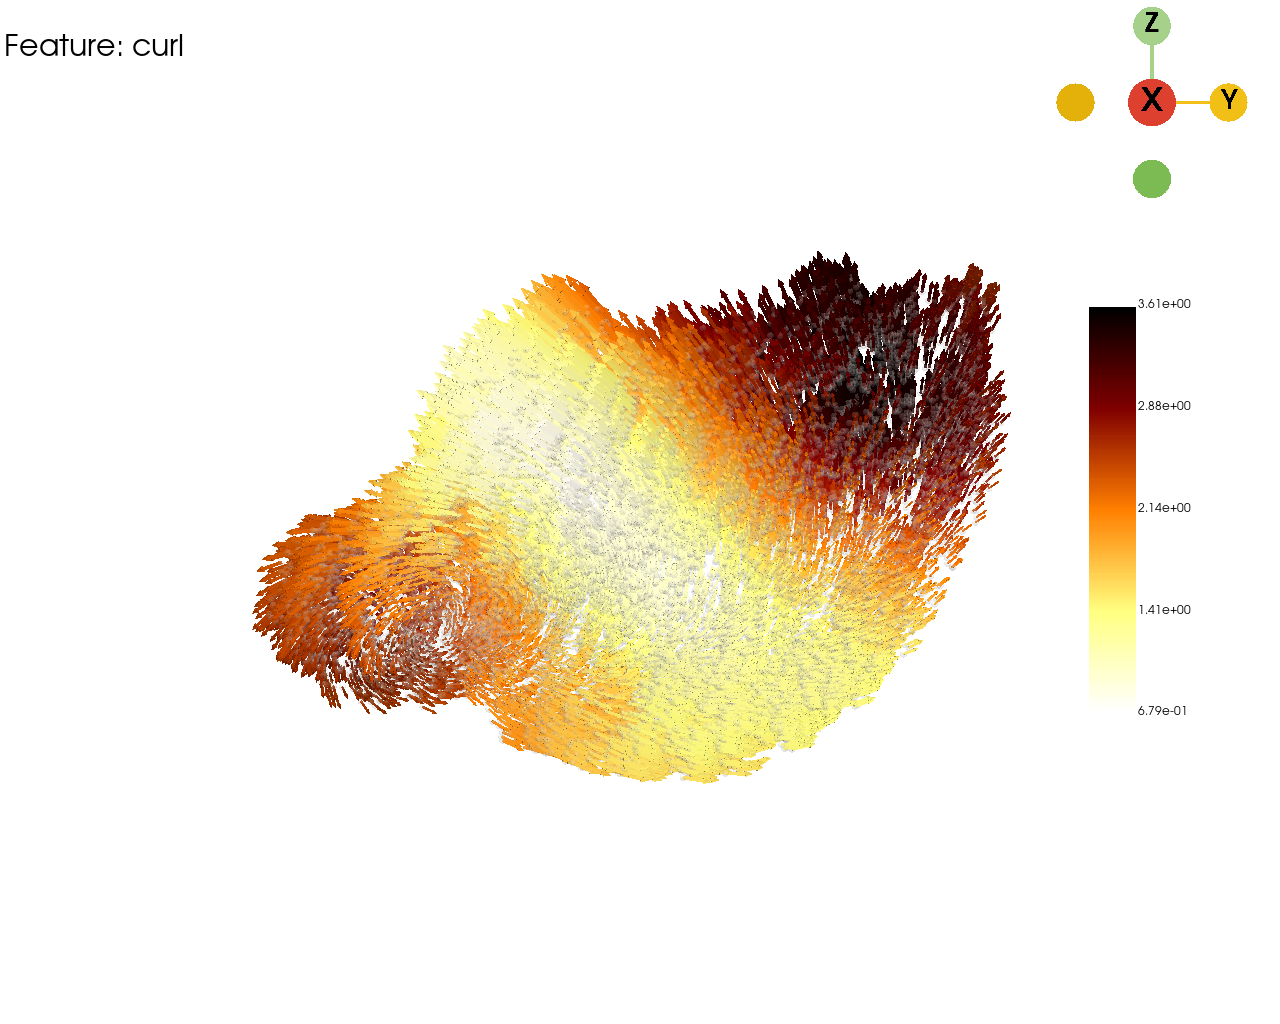

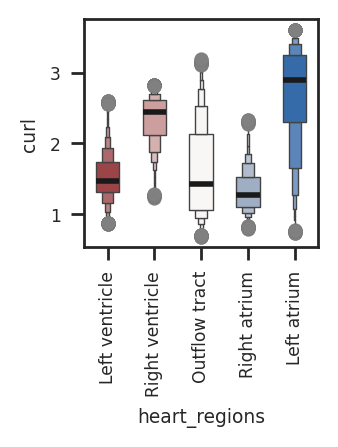

In [13]:
key = "curl"
st.tdr.morphofield_curl(adata=E95_adata, vf_key="VecFld_morpho",  key_added=key)
st.pl.curl(
    adata=E95_adata,
    model=st.tdr.collect_models([E95_heart_pc, E95_heart_arrows]),
    curl_key=key,
    colormap=["gainsboro", "afmhot_r"],
    model_style=["points", "wireframe"],
    opacity=[0.2, 1],
    model_size=[7, 1],
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
    background="white",
)

f, ax = plt.subplots(figsize=(1.5, 1.5))
sns.boxenplot(E95_adata.obs[["heart_regions", key]], x="heart_regions", y=key, palette=regions_colors, order=regions, linewidth=.5, line_kws=dict(linewidth=2, color="k"), flier_kws=dict(facecolor=".5", linewidth=.1), width=.5)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Calculating divergence: 100%|██████████| 20/20 [00:00<00:00, 87.31it/s]


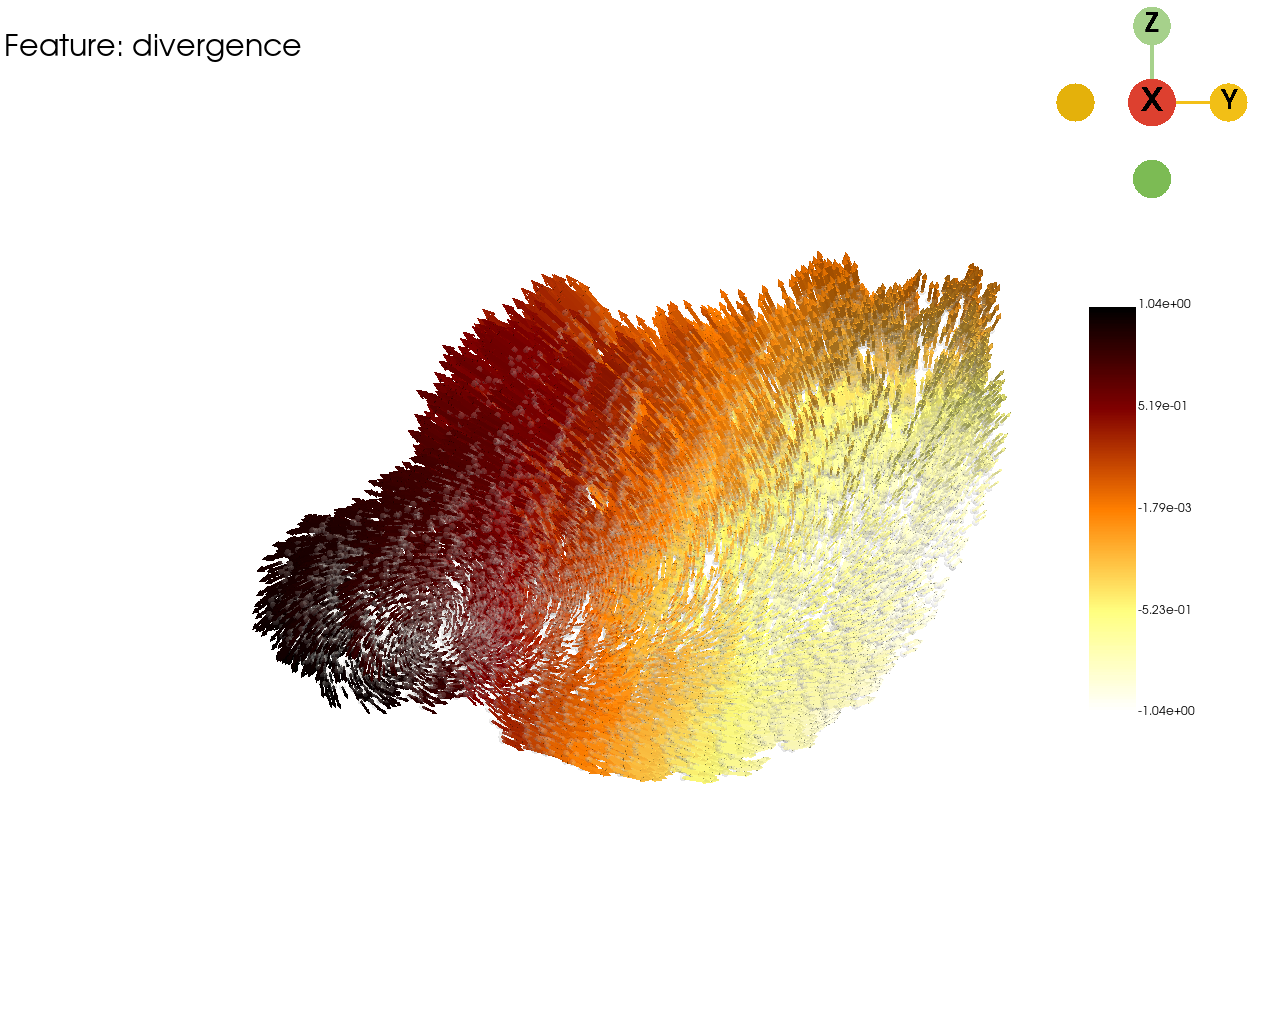

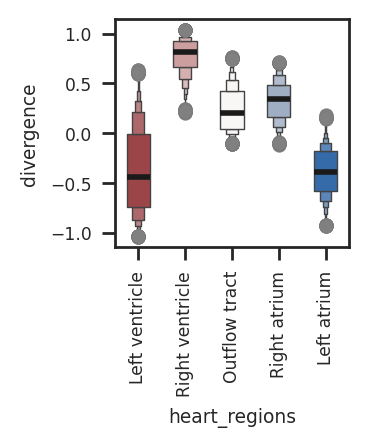

In [14]:
key = "divergence"
st.tdr.morphofield_divergence(adata=E95_adata, vf_key="VecFld_morpho",  key_added=key)
st.pl.divergence(
    adata=E95_adata,
    model=st.tdr.collect_models([E95_heart_pc, E95_heart_arrows]),
    divergence_key=key,
    colormap=["gainsboro", "afmhot_r"],
    model_style=["points", "wireframe"],
    opacity=[0.2, 1],
    model_size=[7, 1],
    jupyter="static",
    cpo="yz",
    window_size=(1280, 1024),
    background="white",
)

f, ax = plt.subplots(figsize=(1.5, 1.5))
sns.boxenplot(E95_adata.obs[["heart_regions", key]], x="heart_regions", y=key, palette=regions_colors, order=regions, linewidth=.5, line_kws=dict(linewidth=2, color="k"), flier_kws=dict(facecolor=".5", linewidth=.1), width=.5)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Figure 6h- Top significant genes (“morphogenic genes”)

st.tl.glm_degs(
    adata=E95_adata,
    fullModelFormulaStr=f'~cr(acceleration, df=3)',
    key_added="glm_degs",
    qval_threshold=0.01,
    llf_threshold=-100,
)

glm_data = pd.DataFrame(adata.uns["glm_degs"]["glm_result"])

glm_data.to_csv(os.path.join(img_out_dir, f"mouse_{morpho_id}_morphofield_model_{key}_glm_degs.csv"), sep="\t")

In [26]:
top_genes = {
    'acceleration_genes': [
        'Angpt1', 'Crabp2', 'Vsnl1', 'Stard10', 'Nr2f1', 'Casq1', 'Ap3b2', 'Fbxo32', 'Pdlim7', 'Glrx5',
        'Slc25a37', 'Kcna5', 'Nr2f2', 'Kank3', 'Dsp', 'Sphkap', 'Cited4', 'Itgb3', 'Nrp2'
    ],
    'curl_genes': [
        'Trabd2b', 'Pitx2', 'Dcaf12l1', 'Bmp2', 'Tbx20', 'Wnt2', 'Nos1ap', 'Itga6', 'Gnb1l', 'Id2', 'Cacna2d2',
        'Tmtc2', 'Rgs6', 'Taco1', 'Prrx2', 'Fbxo32', 'Ifitm10', 'Adora1', 'Fam78a', 'Arhgap21', 'Smarcd3',
        'Tcea3', 'Tbx2', 'Id4', 'Sfrp1', 'Rbm38', 'Swap70', 'Thbs4'
    ],
    'divergence_genes': [
        'Crabp1', 'Tdgf1', 'Cck', 'Crabp2', 'Fhl1', 'Itm2a', 'Cdx2', 'Mid1', 'Meg3', 'Cd59a', 'Pln', 'Nop58', 
        'Hoxc10', 'Myocd', 'Hey2', 'Prtg', 'Nes', 'Plppr5', 'Tril', 'Hoxb5os', 'Bcat1', 'Irx2', 'Prdx4', 
        'Pcdh7', 'Pax6', 'Npm3', 'Palm2', 'Meis1', 'Asb2', 'Krtcap2', 'Tspan7', 'Phactr4', 'Hoxb1', 'Casq1', 
        'Sema5b', 'Nav1', 'Meis2', 'Ola1', 'Mirg', 'Grin3a', 'Mmachc', 'Ppp1r17', 'Hes5', 'Dgkk', 'Mapk8ip1', 'Nop10', 'Fam186a', 'Nup43', 'Hoxd3'
    ],
}

mean_exp_datas, qv_datas =[], []
import scanpy as sc
for mm_key in ['divergence', 'curl', 'acceleration']:
    _adata = st.read_h5ad(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E9.5_h5ad/mouse_E9.5_heart_morphogenesis_{key}.h5ad")
    _adata.X = _adata.layers["total"].copy()
    sc.pp.normalize_total(_adata)
    sc.pp.log1p(_adata)
    
    top_mm_genes = top_genes[f'{mm_key}_genes']
    glm_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/figure5/morphometrics_{mm_key}/mouse_heart_morphogenesis_{mm_key}_morphofield_model_{mm_key}_selected_glm_degs.csv", sep="\t", index_col=0)
    qv_datas.append(glm_data.loc[top_mm_genes, "qval"])
    
    mean_exp_data = []
    for g in top_mm_genes:
        mean_exp = np.asarray([_adata[_adata.obs["heart_regions"] == r, g].X.A.mean() for r in regions])
        mean_exp = mean_exp / mean_exp.sum()
        mean_exp_data.append(mean_exp)
    mean_exp_data = pd.DataFrame(mean_exp_data, index=top_mm_genes, columns=regions)
    mean_exp_datas.append(mean_exp_data)

In [27]:
acceleration_genes = top_genes['acceleration_genes']
curl_genes = top_genes['curl_genes']
divergence_genes = top_genes['divergence_genes']

acc_unique = list(set(acceleration_genes).difference(set(curl_genes)))
acc_unique = list(set(acc_unique).difference(set(divergence_genes)))

acc_cur_overlap = list(set(acceleration_genes).intersection(set(curl_genes)))
acc_div_overlap = list(set(acceleration_genes).intersection(set(divergence_genes)))

cur_unique = list(set(curl_genes).difference(set(acceleration_genes)))
div_unique = list(set(divergence_genes).difference(set(acceleration_genes)))

In [28]:
features = ['acceleration', 'curl', 'divergence']
lscmap = mpl.cm.get_cmap("vlag_r") # gist_rainbow, rainbow, hsv, tab20
features_hex_list = [mpl.colors.to_hex(lscmap(i)) for i in np.linspace(0, 1, len(features))]
features_colors = {i: j for i, j in zip(features, features_hex_list)}

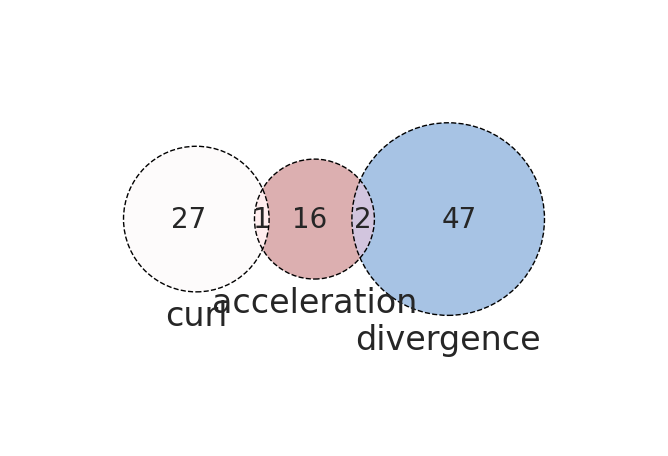

In [30]:
from matplotlib_venn import venn3, venn3_circles

fig, ax = plt.subplots(figsize=(3, 3))
v = venn3(subsets=(16, 27, 1, 47, 2, 0, 0), set_labels = ('acceleration', 'curl', 'divergence'), set_colors=features_hex_list, ax=ax)
c = venn3_circles(subsets=(16, 27, 1, 47, 2, 0, 0), linestyle='dashed', linewidth=0.5, ax=ax)
plt.show()

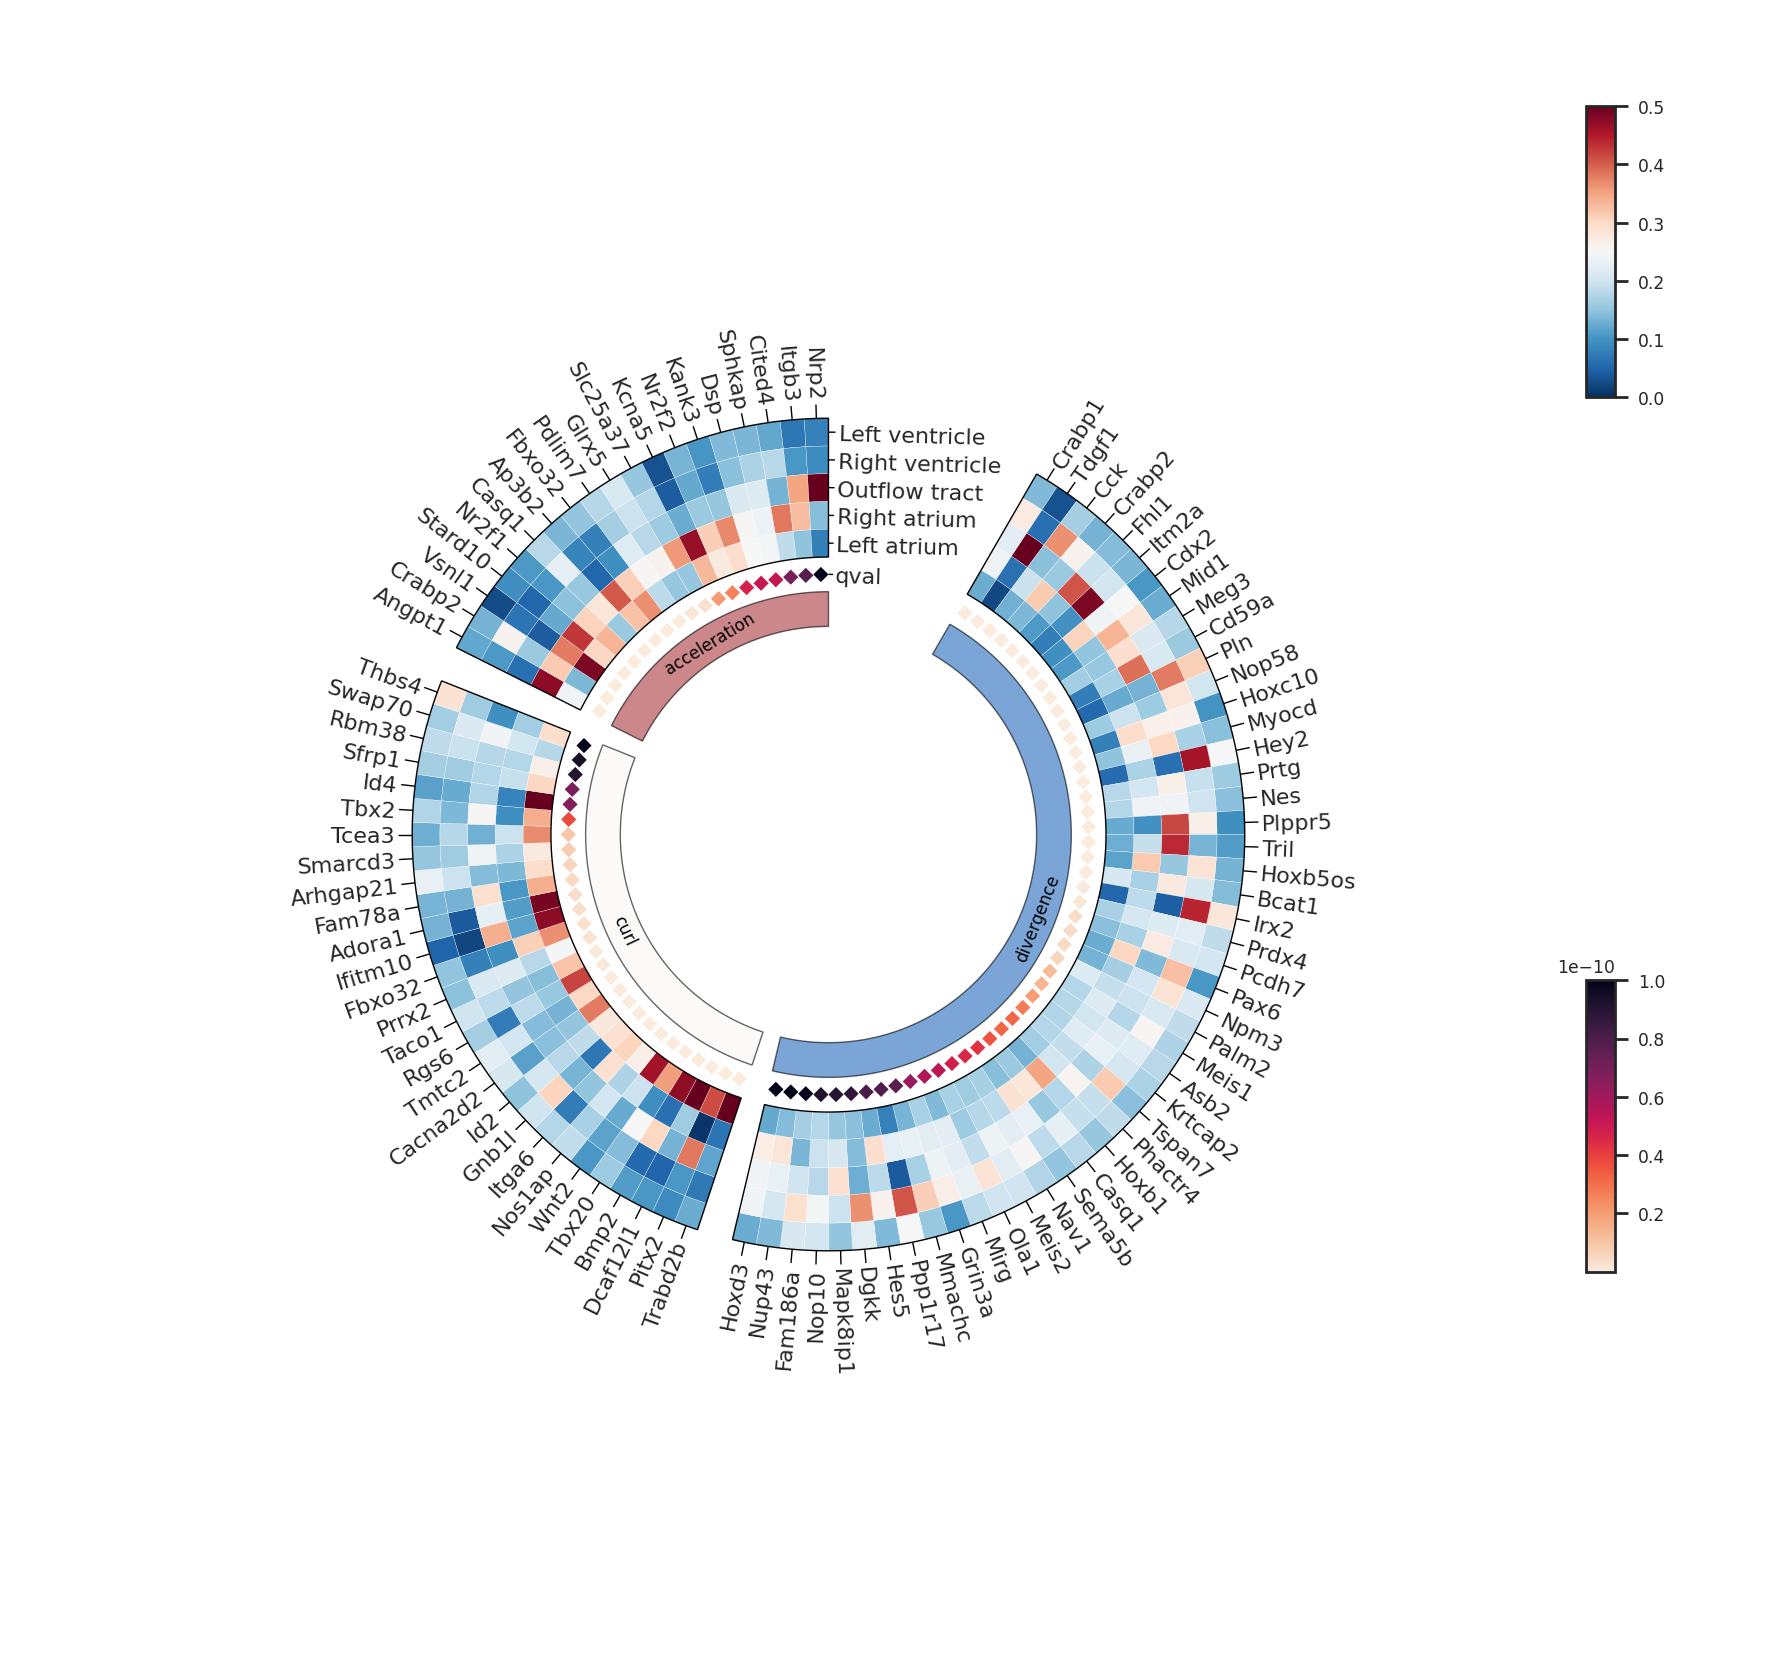

In [29]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"divergence": mean_exp_datas[0].shape[0], "curl": mean_exp_datas[1].shape[0], "acceleration": mean_exp_datas[2].shape[0]}
circos = Circos(sectors, space=5, start=30, end=360, endspace=False)

vmin_qv, vmax_qv = 1e-20, 1e-10
vmin_exp, vmax_exp = 0, 0.5
for i, sector in enumerate(circos.sectors):
    start_col = 60
    
    track_exp = sector.add_track((start_col-20, start_col))
    track_exp.axis()
    sub_exp_data = mean_exp_datas[i].T
    sub_exp_data[sub_exp_data >=0.5] = 0.5
    track_exp.heatmap(sub_exp_data, vmin=vmin_exp, vmax=vmax_exp, cmap="RdBu_r", rect_kws=dict(ec="white", lw=0.1))
    x = np.linspace(1, int(track_exp.size), int(track_exp.size)) - 0.5
    xlabels = list(sub_exp_data.columns)
    track_exp.xticks(x, xlabels, outer=True, label_orientation="vertical")
    if i + 1 == len(sectors):
        track_exp.yticks([4.5, 3.5, 2.5, 1.5, 0.5], regions, vmin=0, vmax=5)
    
    track_qv = sector.add_track((start_col-25, start_col-22.5))
    x = np.linspace(1, int(track_qv.size), int(track_qv.size)) - 0.5
    y = np.ones(shape=(int(track_qv.size),)) - 0.5
    c = np.asarray(qv_datas[i])
    track_qv.scatter(x, y, c=c, s=15, marker="D", cmap="rocket_r")
    if i + 1 == len(sectors):
        track_qv.yticks([1], ["qval"], vmin=0, vmax=1)
    
    track_label = sector.add_track((start_col-30, start_col-25))
    track_label.axis(fc=features_colors[sector.name], alpha=0.6)
    track_label.text(sector.name, color="black", size=6, r=start_col-27.5)

circos.colorbar(bounds=(1.02, 0.8, 0.02, 0.2), vmin=vmin_exp, vmax=vmax_exp, orientation="vertical", cmap="RdBu_r")
circos.colorbar(bounds=(1.02, 0.2, 0.02, 0.2), vmin=vmin_qv, vmax=vmax_qv, orientation="vertical", cmap="rocket_r")

fig = circos.plotfig()
plt.show()

## Figure 6i- GO enrichment analyses of all morphogenic genes

In [31]:
import gseapy as gp
gp.get_library_name(organism="mouse")
go_bp = gp.enrichr(
        gene_list=acceleration_genes+curl_genes+divergence_genes,
        gene_sets="GO_Biological_Process_2023",
        organism="mouse",
        no_plot=True,
        verbose=True
)
go_bp_results = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/figure5/morphometrics_genes/heart_morphogenesis_genes_GO/GO_Biological_Process_2023.mouse.enrichr.reports.txt", sep="\t")

<AxesSubplot:title={'center':'GO_Biological_Process_2023'}, xlabel='Combined Score'>

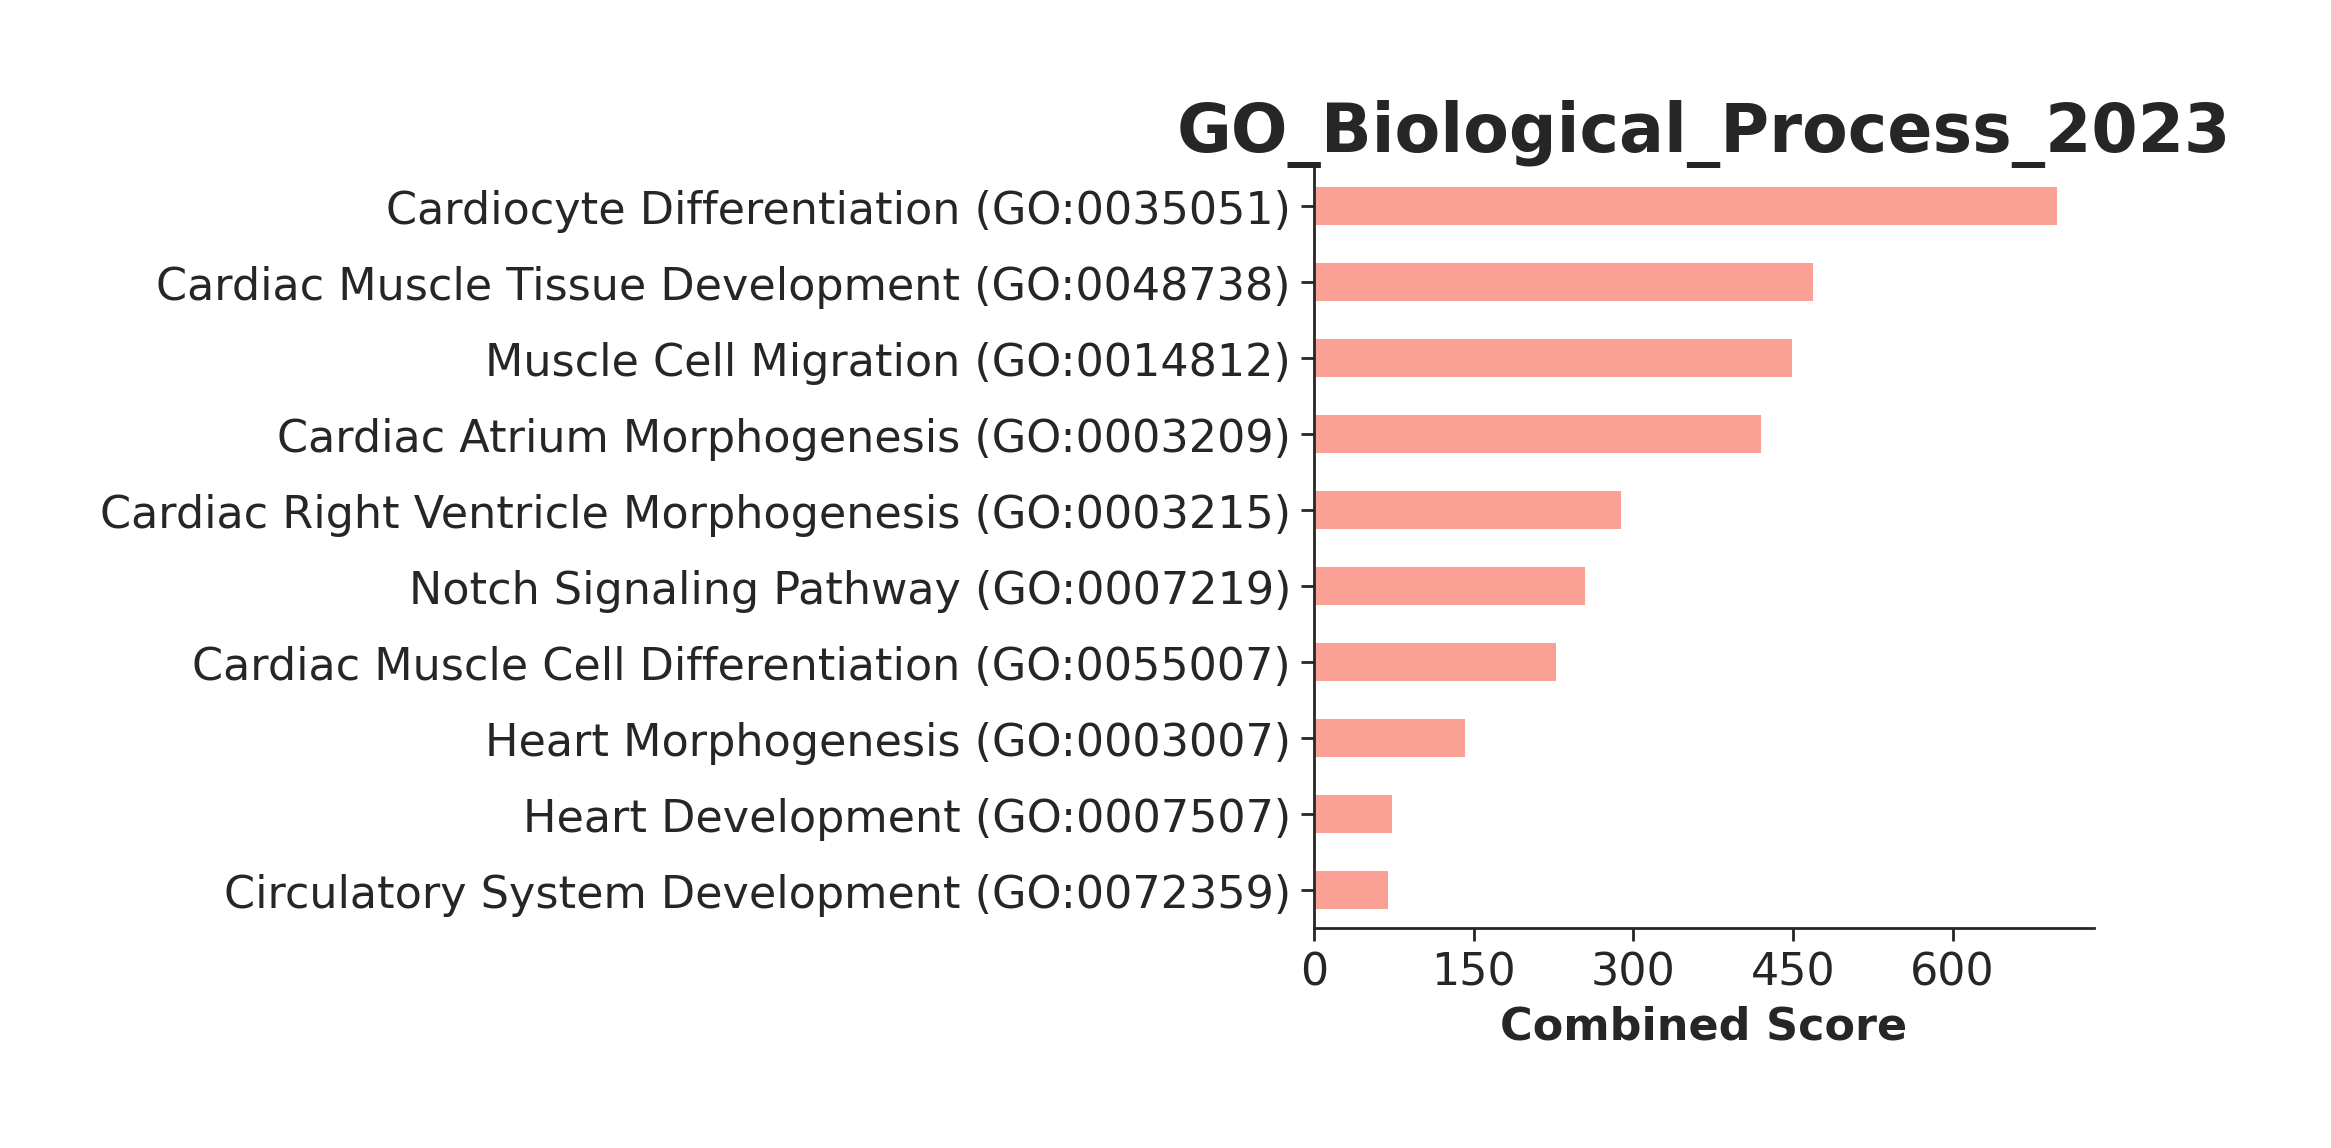

In [33]:
selected_go_term = [
    "Cardiac Muscle Tissue Development (GO:0048738)", 
    "Cardiocyte Differentiation (GO:0035051)", 
    "Notch Signaling Pathway (GO:0007219)",
    "Cardiac Atrium Morphogenesis (GO:0003209)",
    "Heart Development (GO:0007507)",
    "Heart Morphogenesis (GO:0003007)",
    "Cardiac Muscle Cell Differentiation (GO:0055007)",
    "Circulatory System Development (GO:0072359)",
    "Muscle Cell Migration (GO:0014812)",
    "Cardiac Right Ventricle Morphogenesis (GO:0003215)"
]
go_bp_results = go_bp_results.loc[go_bp_results["Term"].isin(selected_go_term), :]
gp.barplot(go_bp_results, column='Combined Score', title='GO_Biological_Process_2023', cutoff=0.0, top_term=50, figsize=(5, 5))

## Figure 6j- 3D scatter plot of the gene expression of example genes

{'obs_keys': [], 'var_keys': ['Angpt1']}


Epoch: 100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


|-----> Creating an adata object with the interpolated expression...
|-----> [GaussianProcessInterpolation] in progress: 100.0000%
|-----> [GaussianProcessInterpolation] finished [82.5797s]


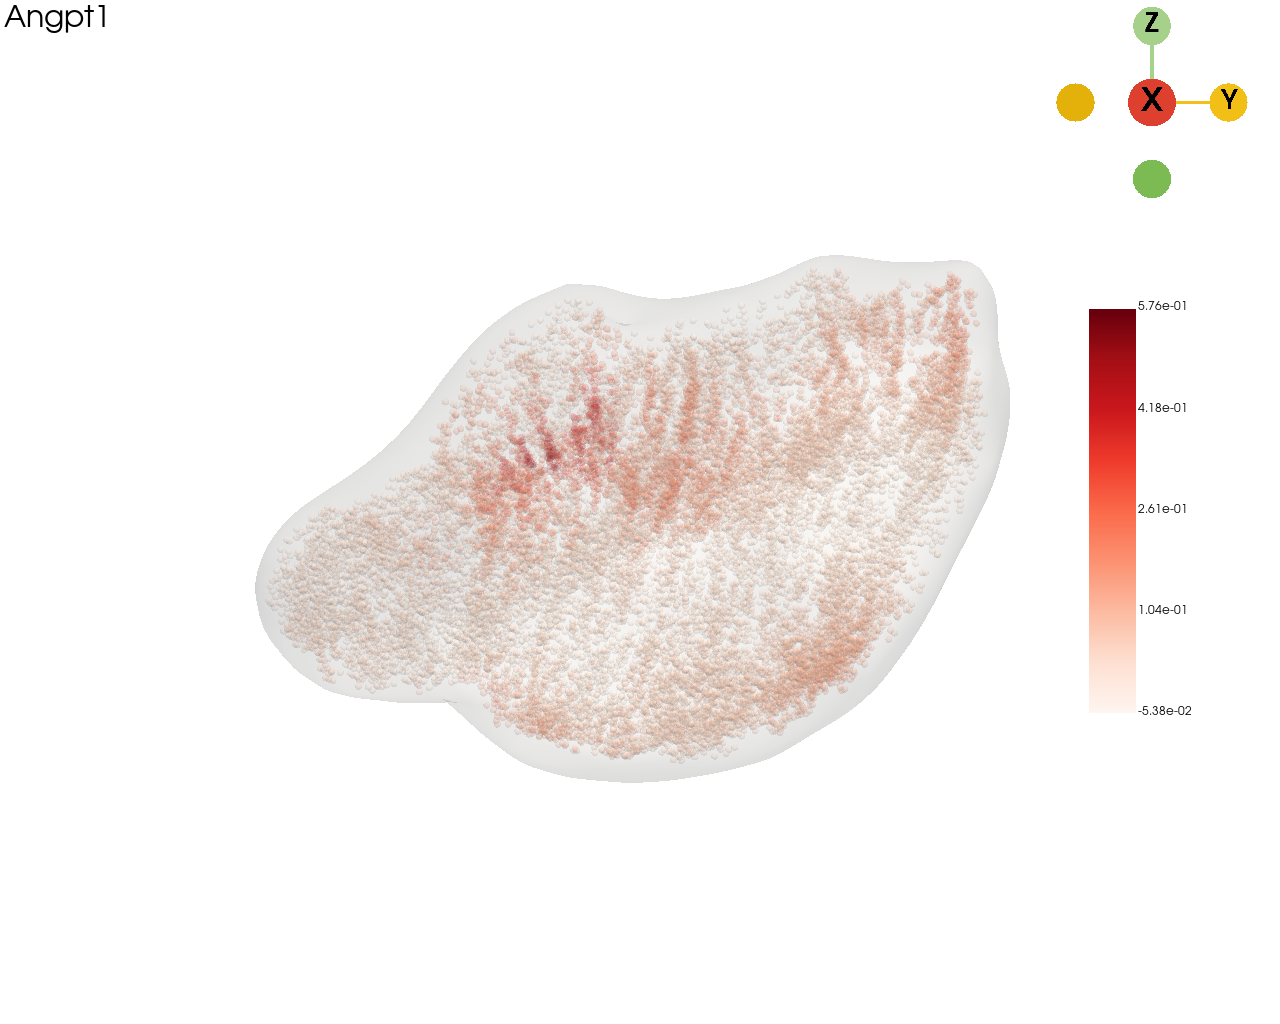

{'obs_keys': [], 'var_keys': ['Pitx2']}


Epoch: 100%|██████████| 100/100 [00:20<00:00,  5.00it/s]


|-----> Creating an adata object with the interpolated expression...
|-----> [GaussianProcessInterpolation] in progress: 100.0000%
|-----> [GaussianProcessInterpolation] finished [20.3634s]


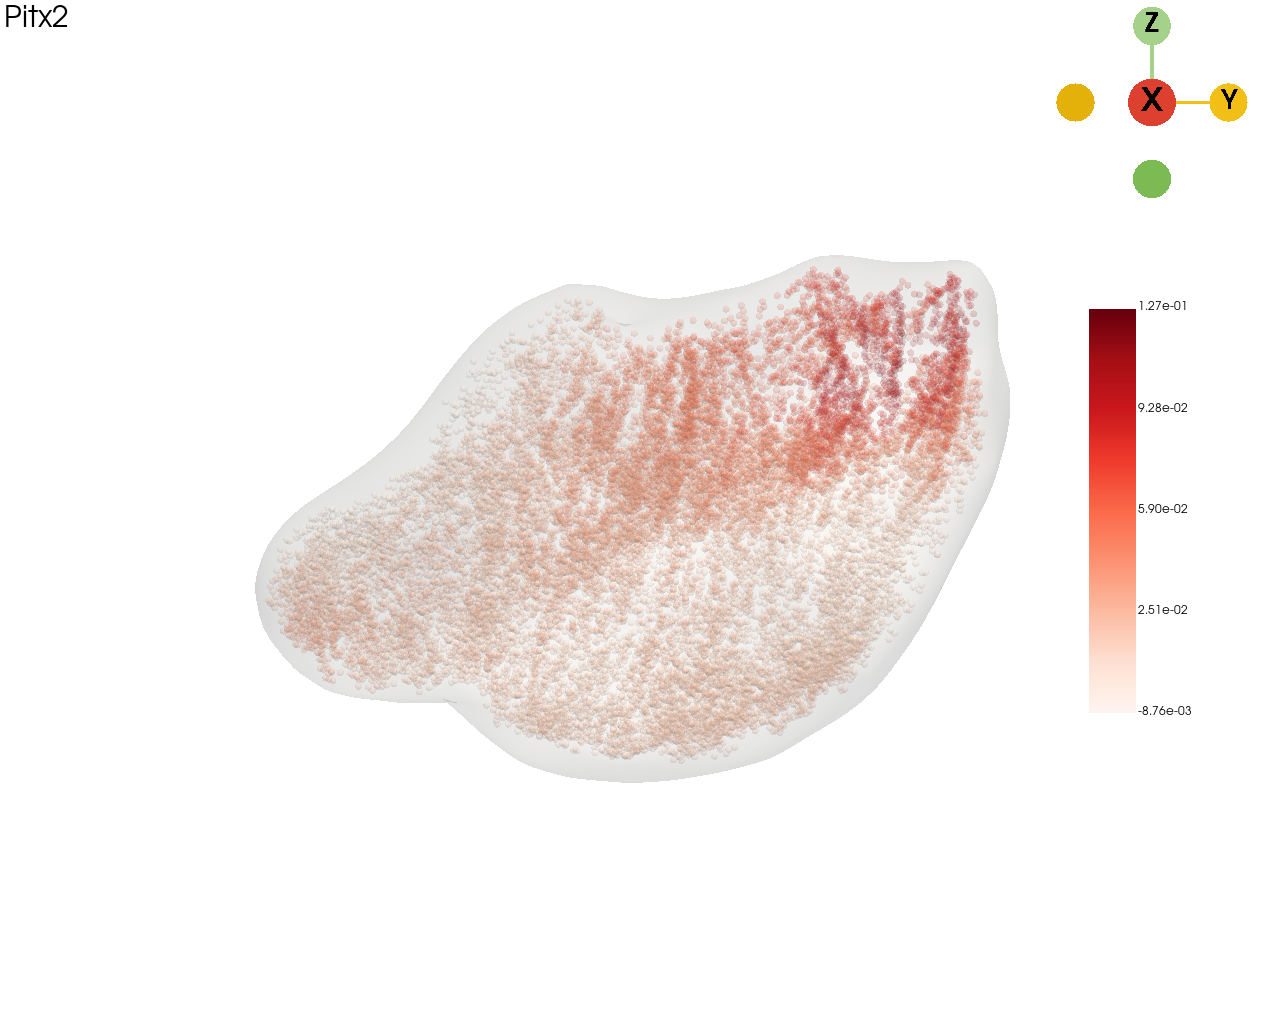

{'obs_keys': [], 'var_keys': ['Hey2']}


Epoch: 100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


|-----> Creating an adata object with the interpolated expression...
|-----> [GaussianProcessInterpolation] in progress: 100.0000%
|-----> [GaussianProcessInterpolation] finished [19.5376s]


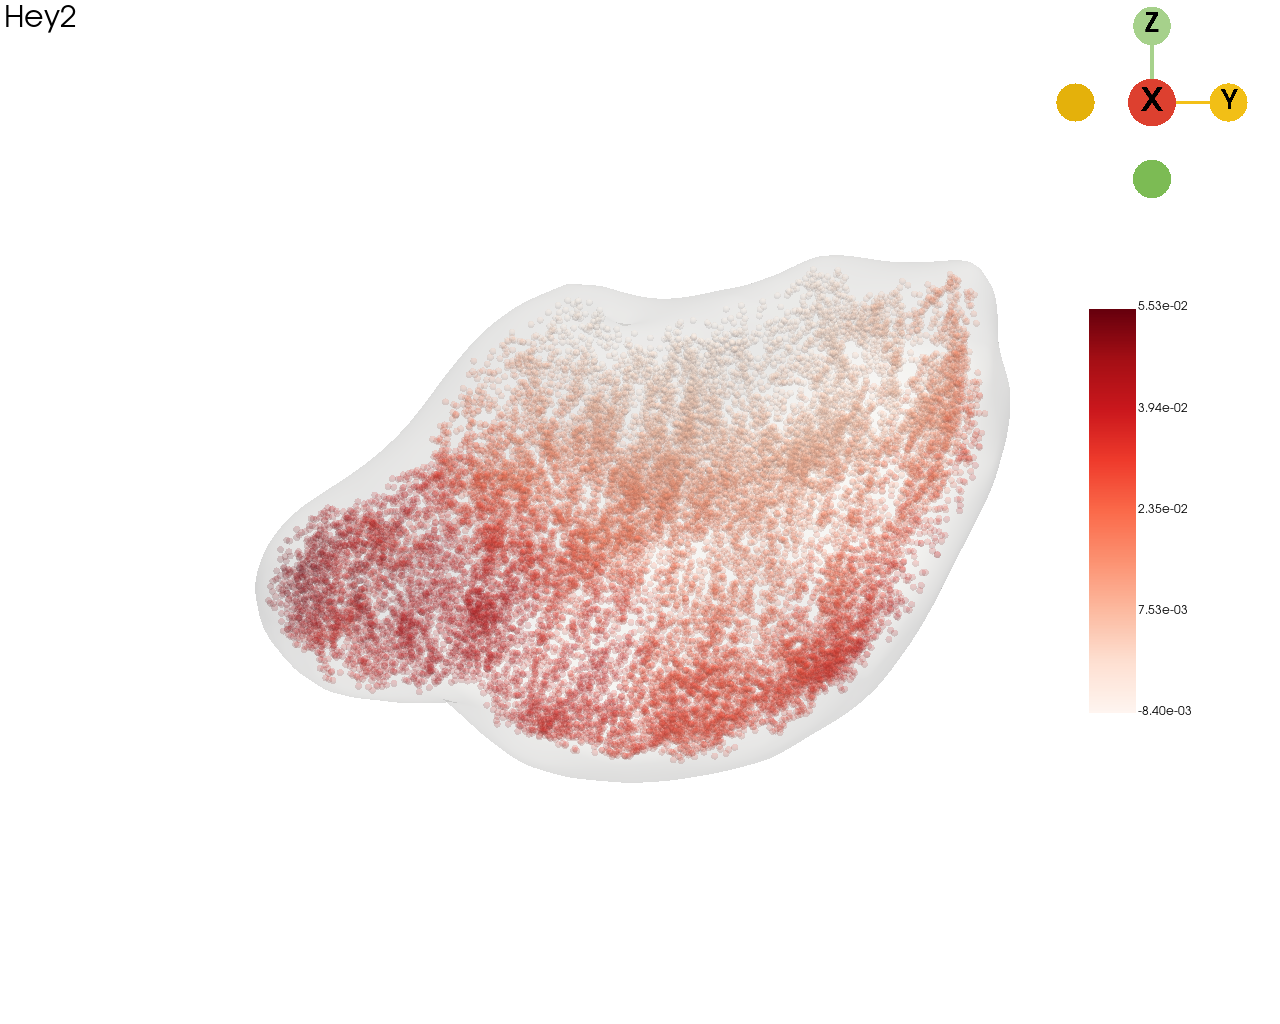

In [7]:
E95_mesh_model = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E9.5_vtk/mouse_E9.5_heart_mesh_model.vtk")

for gn in ['Angpt1', 'Pitx2', 'Hey2']:
    interpolated_gp_adata = st.tdr.gp_interpolation(source_adata=E95_adata.copy(), spatial_key="3d_align_spatial", keys=gn,
                                                    target_points=np.asarray(E95_pc.points), device="0",training_iter=100)
    interpolated_gp_pc, _ = st.tdr.construct_pc(adata=interpolated_gp_adata.copy(), spatial_key="3d_align_spatial", groupby=gn,
                                                key_added=gn)
    _gn = str(gn).replace(":", "_") if ":" in gn else gn
    
    st.pl.three_d_plot(
    model = st.tdr.collect_models([E95_mesh_model, interpolated_gp_pc]),
    key = ["heart_regions", gn],
    model_style = ["surface", "points"],
    model_size = 7,
    opacity = [0.4, 0.2],
    colormap = [None, "Reds"],
    show_legend = True,
    jupyter = "static",
    off_screen = False,
    cpo = "yz",
    window_size = (1280, 1024),
    text = gn,
    )